In [112]:
meanAP_json = "/home/tlips/Documents/diffusing-synthetic-data/dsd/experiments/run_metrics/meanAP_dict.json"
AKD_json = "/home/tlips/Documents/diffusing-synthetic-data/dsd/experiments/run_metrics/AKD_dict.json"
median_KD_json = "/home/tlips/Documents/diffusing-synthetic-data/dsd/experiments/run_metrics/median_KD_dict.json"

seg_map_json = "/home/tlips/Documents/diffusing-synthetic-data/dsd/experiments/run_metrics/seg_meanAP_dict.json"
bbox_map_json = "run_metrics/bbox_meanAP_dict.json"


In [113]:
# read the dicts
import json
with open(meanAP_json, "r") as f:
    meanAP_dict = json.load(f)
with open(AKD_json, "r") as f:
    AKD_dict = json.load(f)
with open(median_KD_json, "r") as f:
    median_KD_dict = json.load(f)

with open(seg_map_json, "r") as f:
    seg_map_dict = json.load(f)
with open(bbox_map_json, "r") as f:
    bbox_map_dict = json.load(f)
    
print(meanAP_dict)

{'RANDOM_TEXTURES_SHOES_RUN': 0.5885941386222839, 'RANDOM_TEXTURES_TSHIRTS_RUN': 0.5771121978759766, 'PROMPT_CLASSNAME_MUGS_RUN': 0.4803648293018341, 'PROMPT_CLASSNAME_SHOES_RUN': 0.535736620426178, 'PROMPT_CLASSNAME_TSHIRTS_RUN': 0.4331309497356415, 'PROMPT_GEMINI_MUGS_RUN': 0.4751174747943878, 'PROMPT_GEMINI_SHOES_RUN': 0.5470346808433533, 'PROMPT_GEMINI_TSHIRTS_RUN': 0.5549566149711609, 'PROMPT_BLIP_MUGS_RUN': 0.5225757956504822, 'PROMPT_BLIP_SHOES_RUN': 0.5204551815986633, 'PROMPT_BLIP_TSHIRTS_RUN': 0.5137262344360352, 'TWO_STAGE_BASELINE_MUGS_RUN': 0.4820623695850372, 'TWO_STAGE_BASELINE_SHOES_RUN': 0.5717434287071228, 'TWO_STAGE_BASELINE_TSHIRTS_RUN': 0.511047899723053, 'NO_TABLE_ONE_STAGE_MUGS_RUN': 0.5040954947471619, 'NO_TABLE_ONE_STAGE_SHOES_RUN': 0.5546733736991882, 'NO_TABLE_ONE_STAGE_TSHIRTS_RUN': 0.6297934651374817, 'RANDOM_TEXTURES_NO_TABLE_MUGS_RUN': 0.4947879016399383, 'RANDOM_TEXTURES_NO_TABLE_SHOES_RUN': 0.6190323829650879, 'RANDOM_TEXTURES_NO_TABLE_TSHIRTS_RUN': 0.5

In [114]:
# combine the dicts into a single table
# for the akd and median, average over all channels

for key in median_KD_dict.keys():
    median_KD_dict[key]["avg"] = sum(median_KD_dict[key].values())/len(median_KD_dict[key])
for key in AKD_dict.keys():
    AKD_dict[key]["avg"] = sum(AKD_dict[key].values())/len(AKD_dict[key])


In [115]:
# combine meanAP with avg AKD and median KD into a single table
table = {}
for key in AKD_dict.keys():
    table[key] = {"meanAP": meanAP_dict[key], "AKD": AKD_dict[key]["avg"], "median_KD": median_KD_dict[key]["avg"]}
    try:
        table[key].update({"seg_map": seg_map_dict[key], "bbox_map": bbox_map_dict[key]})
    except KeyError as e :
        #print(e)
        pass
# parse the category by checking the key for keywords: must be (tshirt, shoe or mug)
for key in table.keys():
    if "tshirt" in key.lower():
        table[key]["category"] = "tshirt"
    elif "shoe" in key.lower():
        table[key]["category"] = "shoe"
    elif "mug" in key.lower():
        table[key]["category"] = "mug"
    else:
        table[key]["category"] = "unknown"

# parse the experiment , must be in (real, random, blip, gemini, class)
for key in table.keys():
    print(key)
    if "real" in key.lower():
        table[key]["experiment"] = "real"
    elif "random" in key.lower() and not "no_table" in key.lower() and not "scale" in key.lower():
        table[key]["experiment"] = "random"
    elif "blip" in key.lower():
        table[key]["experiment"] = "prompts-blip"
    elif "gemini" in key.lower():
        table[key]["experiment"] = "prompts-gemini"
    elif "class" in key.lower():
        table[key]["experiment"] = "prompts-classname"
    elif "two_stage" in key.lower():
        table[key]["experiment"] = "two-stage"
    
    elif "one_stage" in key.lower() and "no_table" in key.lower():
        table[key]["experiment"] = "one-stage-no-table"
    elif "random" in key.lower() and "no_table" in key.lower():
        table[key]["experiment"] = "random-no-table"

    elif "three_stage" in key.lower():
        table[key]["experiment"] = "three-stage"
    
    elif "dual_inpainting" in key.lower():
        table[key]["experiment"] = "dual-inpainting"

    elif "img2img" in key.lower():
        table[key]["experiment"] = "img2img"

    elif "scale" in key.lower():
        table[key]['experiment'] = "scale"
    else:
        table[key]["experiment"] = "unknown"

REAL_MUGS_RUN
REAL_SHOES_RUN
REAL_TSHIRTS_RUN
RANDOM_TEXTURES_MUGS_RUN
RANDOM_TEXTURES_SHOES_RUN
RANDOM_TEXTURES_TSHIRTS_RUN
PROMPT_CLASSNAME_MUGS_RUN
PROMPT_CLASSNAME_SHOES_RUN
PROMPT_CLASSNAME_TSHIRTS_RUN
PROMPT_GEMINI_MUGS_RUN
PROMPT_GEMINI_SHOES_RUN
PROMPT_GEMINI_TSHIRTS_RUN
PROMPT_BLIP_MUGS_RUN
PROMPT_BLIP_SHOES_RUN
PROMPT_BLIP_TSHIRTS_RUN
TWO_STAGE_BASELINE_MUGS_RUN
TWO_STAGE_BASELINE_SHOES_RUN
TWO_STAGE_BASELINE_TSHIRTS_RUN
NO_TABLE_ONE_STAGE_MUGS_RUN
NO_TABLE_ONE_STAGE_SHOES_RUN
NO_TABLE_ONE_STAGE_TSHIRTS_RUN
RANDOM_TEXTURES_NO_TABLE_MUGS_RUN
RANDOM_TEXTURES_NO_TABLE_SHOES_RUN
RANDOM_TEXTURES_NO_TABLE_TSHIRTS_RUN
THREE_STAGE_MUGS_RUN
THREE_STAGE_SHOES_RUN
THREE_STAGE_TSHIRTS_RUN
DUAL_INPAINTING_MUGS_RUN
DUAL_INPAINTING_TSHIRTS_RUN
DUAL_INPAINTING_SHOES_RUN
IMG2IMG_MUGS_RUN
IMG2IMG_SHOES_RUN
IMG2IMG_TSHIRTS_RUN
CCS_O5_MUGS_RUN
CCS_O5_SHOES_RUN
CCS_O5_TSHIRTS_RUN
CCS_10_MUGS_RUN
CCS_10_SHOES_RUN
CCS_10_TSHIRTS_RUN
CCS_15_MUGS_RUN
CCS_15_SHOES_RUN
CCS_15_TSHIRTS_RUN
CCS_20_MUGS_RU

In [116]:
# create pd dataframe
import pandas as pd
df = pd.DataFrame.from_dict(table, orient="index")
df = df.reset_index()
df

# print as csv
df.to_csv("all_metrics.csv")





In [117]:
# create pivot table with category as rows and experiment as columns

pivot = df.pivot_table(index="experiment", columns="category", values=[ "AKD", "seg_map", ])

# limit to 1 decimal
pivot = pivot.round(2)
print(pivot)

# order the categories

col_order = ["real", "random", "prompts-gemini","two-stage","three-stage","one-stage-no-table"]

pivot = pivot.loc[col_order]
pivot







                      AKD                 seg_map             
category              mug    shoe  tshirt     mug  shoe tshirt
experiment                                                    
dual-inpainting     26.28   48.02   95.22    0.30  0.42   0.43
img2img             79.08  116.69  200.26    0.04  0.02   0.04
one-stage-no-table  16.89   20.25   29.74    0.99  0.95   0.90
prompts-blip        16.32   25.18   45.94    0.99  0.94   0.90
prompts-classname   22.75   23.36   66.36    0.98  0.90   0.77
prompts-gemini      17.41   19.58   45.80    0.99  0.95   0.93
random              18.35   13.43   37.93    0.97  0.94   0.75
random-no-table     16.24   13.59   43.87    0.93  0.91   0.63
real                21.65   33.65   25.59    0.97  0.88   0.87
scale               21.85   19.91   50.74    0.97  0.90   0.75
three-stage         20.89   19.28   38.25    0.96  0.91   0.71
two-stage           19.77   21.72   49.30    0.75  0.70   0.62
unknown             21.04   24.32   48.78     NaN   NaN

AKD               seg_map             
category              mug   shoe tshirt     mug  shoe tshirt
experiment                                                  
real                21.65  33.65  25.59    0.97  0.88   0.87
random              18.35  13.43  37.93    0.97  0.94   0.75
prompts-gemini      17.41  19.58  45.80    0.99  0.95   0.93
two-stage           19.77  21.72  49.30    0.75  0.70   0.62
three-stage         20.89  19.28  38.25    0.96  0.91   0.71
one-stage-no-table  16.89  20.25  29.74    0.99  0.95   0.90

In [118]:
# pivot table for all experiments with "prompt" in the name

pivot = df[df["experiment"].str.contains("prompts")].pivot_table(index="experiment", columns="category", values=[ "AKD", "seg_map", ])

# round AKD to 1 decimal and seg_map to 2 decimals
pivot = pivot.round(2)

pivot

AKD               seg_map             
category             mug   shoe tshirt     mug  shoe tshirt
experiment                                                 
prompts-blip       16.32  25.18  45.94    0.99  0.94   0.90
prompts-classname  22.75  23.36  66.36    0.98  0.90   0.77
prompts-gemini     17.41  19.58  45.80    0.99  0.95   0.93

In [119]:
akd_pivot = pivot["AKD"]
segmap_pivot = pivot["seg_map"]

akd_pivot.to_csv("akd_pivot.csv")
segmap_pivot.to_csv("segmap_pivot.csv")

# OVerview


## Keypoints

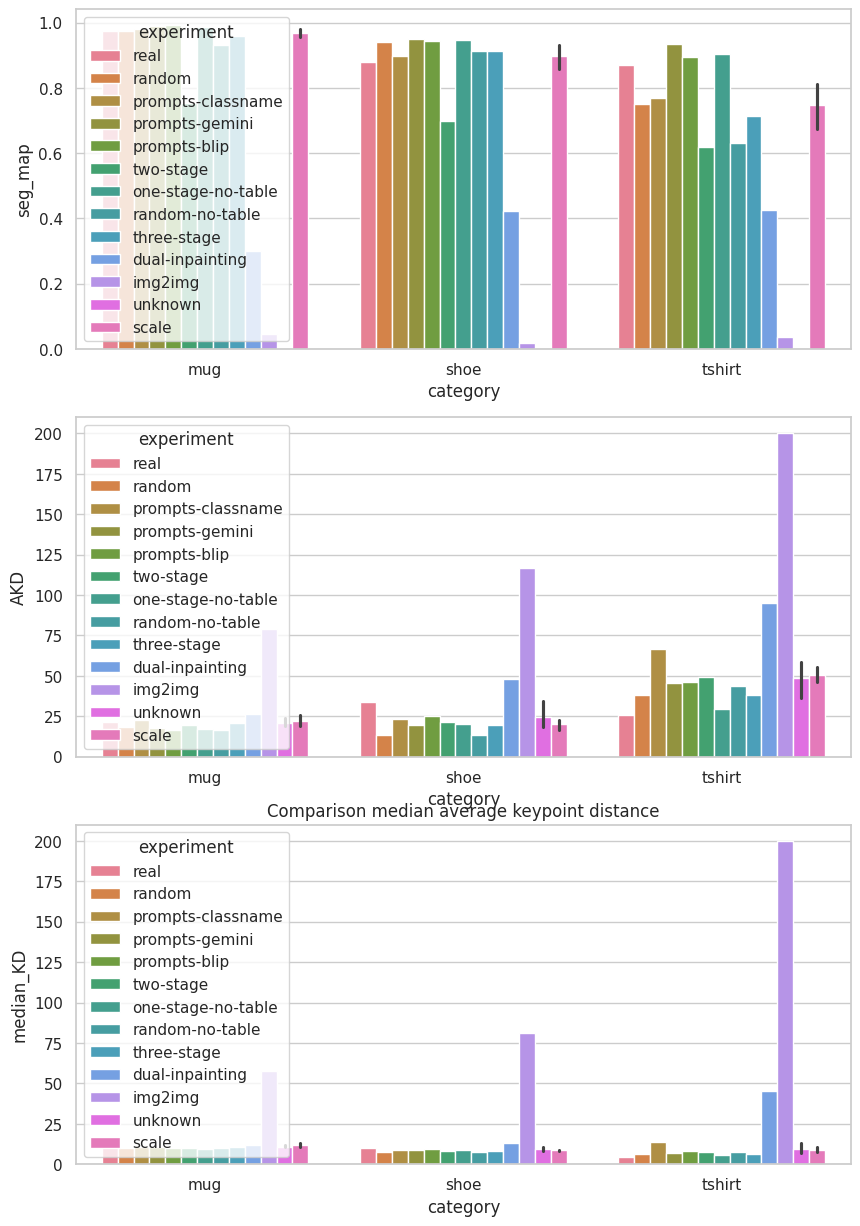

In [120]:
# create a barplot comparing the meanAP, AKD and median KD for each category
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
sns.barplot(x="category", y="seg_map", hue="experiment", data=df, ax=ax[0])
plt.title("Comparison of meanAP")
sns.barplot(x="category", y="AKD", hue="experiment", data=df, ax=ax[1])
plt.title("Comparison average average keypoint distance")
sns.barplot(x="category", y="median_KD", hue="experiment", data=df, ax=ax[2])
plt.title("Comparison median average keypoint distance")
plt.show()

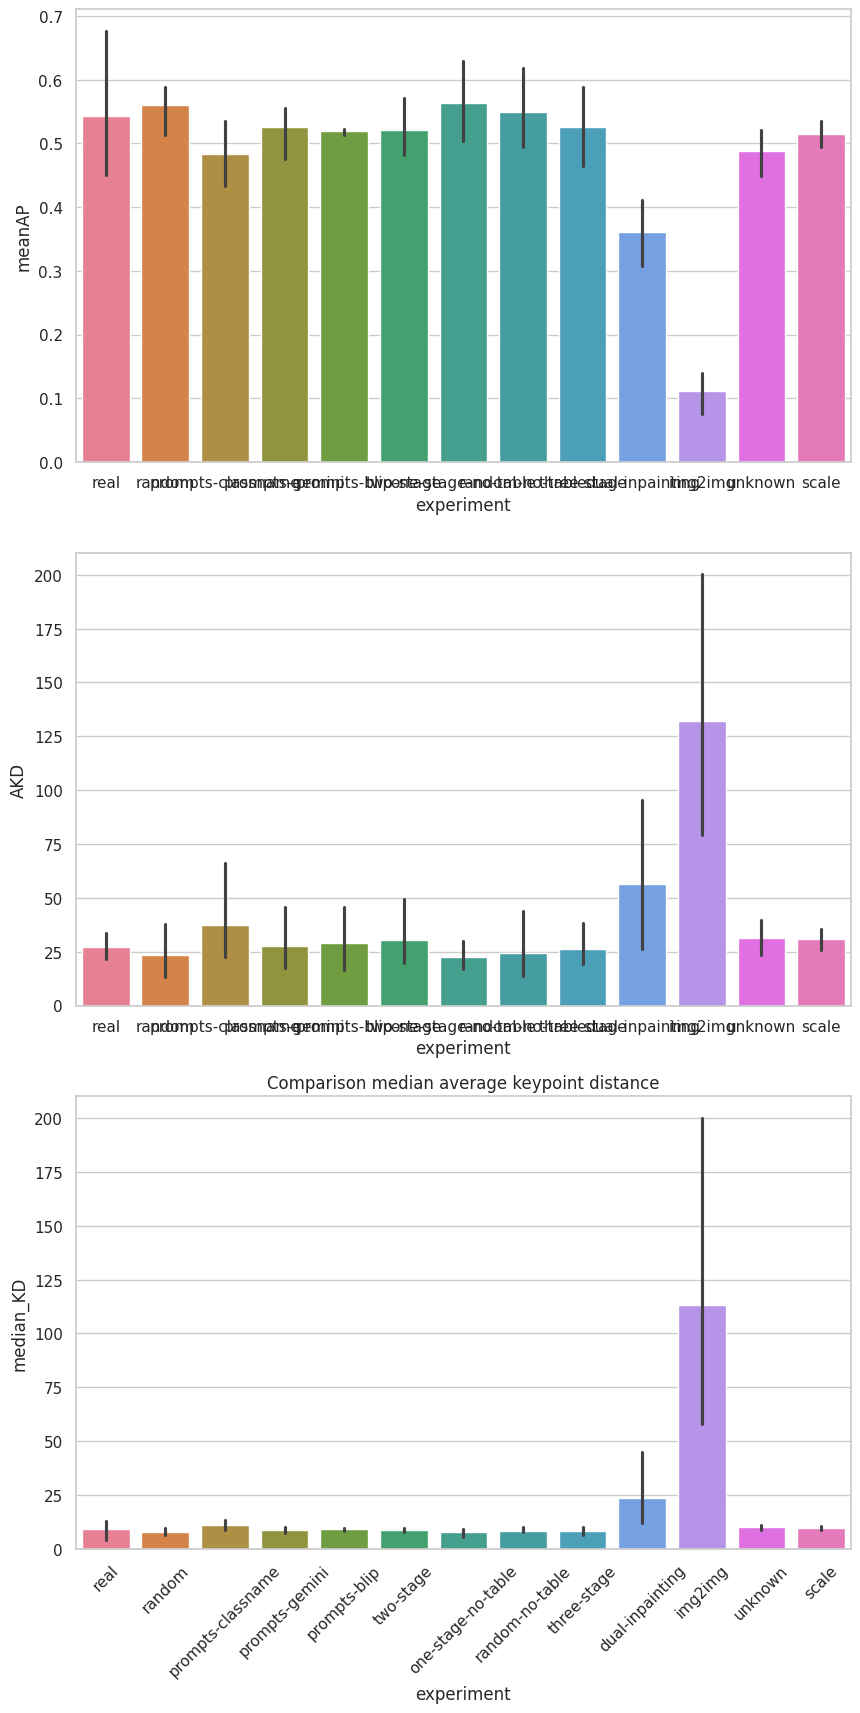

In [121]:
# create similar barchart but average accross the categories, use same color coding
df_avg = df.groupby("experiment").mean(numeric_only=True).reset_index()

# put the real experiments on the left, and the prompts on the right
df_avg = df_avg.sort_values(by="experiment", key=lambda x: x.map({"real":0, "random":1, "prompts-blip":2, "prompts-gemini":3, "prompts-classname":4}))

fig, ax = plt.subplots(3, 1, figsize=(10, 20))
sns.barplot(x="experiment", y="meanAP", data=df, ax=ax[0],hue="experiment")
plt.xticks(rotation=45)

sns.barplot(x="experiment", y="AKD", data=df, ax=ax[1],hue="experiment")
plt.xticks(rotation=45)

plt.title("Comparison average average keypoint distance")
sns.barplot(x="experiment", y="median_KD", data=df, ax=ax[2],hue="experiment")
# labels vertical
plt.xticks(rotation=45)
plt.title("Comparison median average keypoint distance")
plt.show()

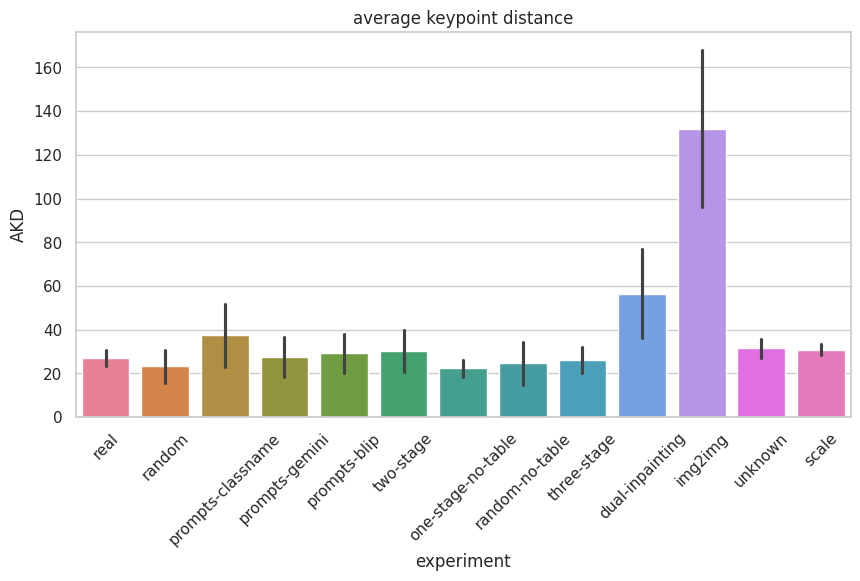

In [122]:
# similar barchart but only median KP distance
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x="experiment", y="AKD", data=df,errorbar=("se"), ax=ax,hue="experiment")
plt.title("average keypoint distance")
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Segmentation mAP')

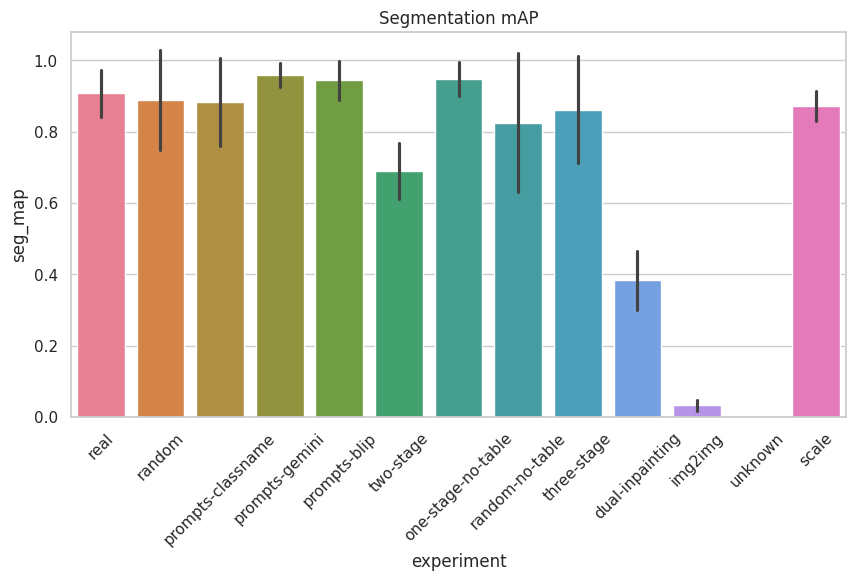

In [123]:
# seg map, keep colormap the same

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x="experiment", y="seg_map", data=df,errorbar=("se",2), ax=ax,hue="experiment")
plt.xticks(rotation=45)
plt.title("Segmentation mAP")

In [124]:
# # for each category, get the average of the meanAP, AKD and median KD
# df_avg_cat = df.groupby("category").mean(numeric_only=True).reset_index()
# df_avg_cat

# df_normalized_cat = df.copy()

# # normalize the meanAP, AKD and median KD, segmentation AP by the avg value in the category

# for cat in df_avg_cat["category"]:
#     meanAP_avg = df_avg_cat[df_avg_cat["category"] == cat]["meanAP"].values[0]
#     AKD_avg = df_avg_cat[df_avg_cat["category"] == cat]["AKD"].values[0]
#     median_KD_avg = df_avg_cat[df_avg_cat["category"] == cat]["median_KD"].values[0]
#     seg_map_avg = df_avg_cat[df_avg_cat["category"] == cat]["seg_map"].values[0]
#     df_normalized_cat.loc[df_normalized_cat["category"] == cat, "meanAP"] = df_normalized_cat[df_normalized_cat["category"] == cat]["meanAP"]/meanAP_avg
#     df_normalized_cat.loc[df_normalized_cat["category"] == cat, "AKD"] = df_normalized_cat[df_normalized_cat["category"] == cat]["AKD"]/AKD_avg
#     df_normalized_cat.loc[df_normalized_cat["category"] == cat, "median_KD"] = df_normalized_cat[df_normalized_cat["category"] == cat]["median_KD"]/median_KD_avg
#     df_normalized_cat.loc[df_normalized_cat["category"] == cat, "seg_map"] = df_normalized_cat[df_normalized_cat["category"] == cat]["seg_map"]/seg_map_avg


# df_normalized_cat

# Prompt experiments

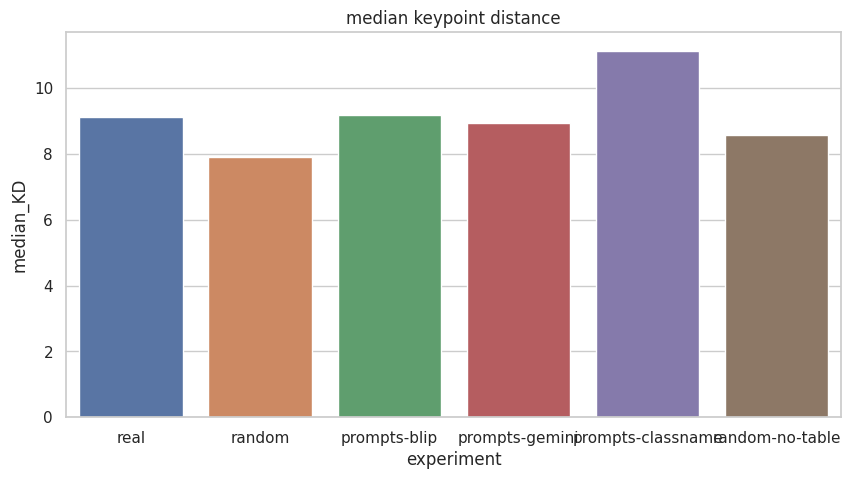

In [125]:
# only plot the median distance
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# select "prompt" experfiments, "real" and "random" in the dataframe
df_prompts = df_avg[df_avg["experiment"].str.contains("prompts") | df_avg["experiment"].str.contains("real") | df_avg["experiment"].str.contains("random")]

sns.barplot(x="experiment", y="median_KD", data=df_prompts, ax=ax,hue="experiment")
plt.title("median keypoint distance")
plt.show()

Text(0.5, 1.0, 'Segmentation mAP')

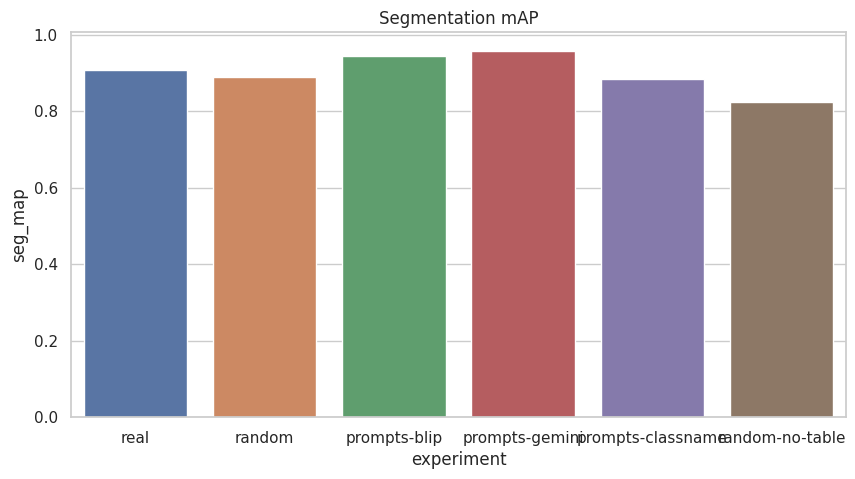

In [126]:
# seg map 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x="experiment", y="seg_map", data=df_prompts, ax=ax,hue="experiment")
plt.title("Segmentation mAP")

# 2 stage   

In [127]:
df_two_stage = df_avg[df_avg["experiment"].str.contains("two-stage") | df_avg["experiment"].str.contains("real") | df_avg["experiment"].str.contains("random") | df_avg["experiment"].str.contains("gemini")]

Text(0.5, 1.0, 'keypoint distance')

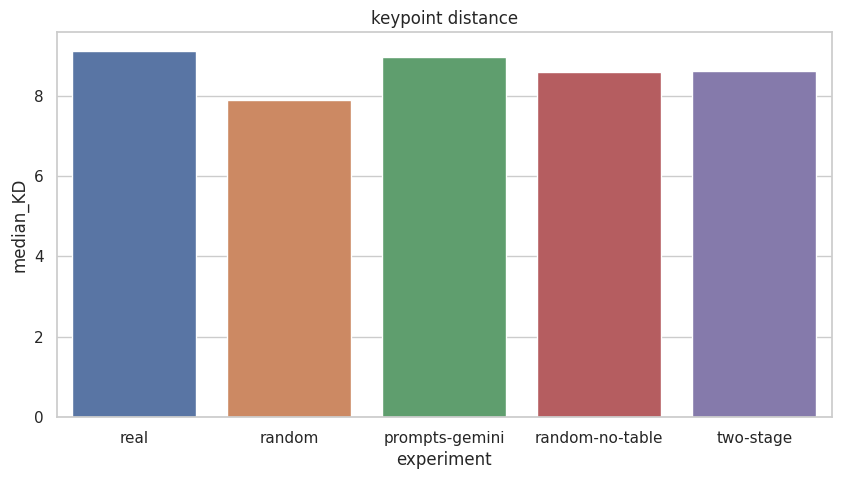

In [128]:
# plot median KD for two-stage
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x="experiment", y="median_KD", data=df_two_stage, ax=ax,hue="experiment")
plt.title("keypoint distance")


Text(0.5, 1.0, 'Segmentation mAP')

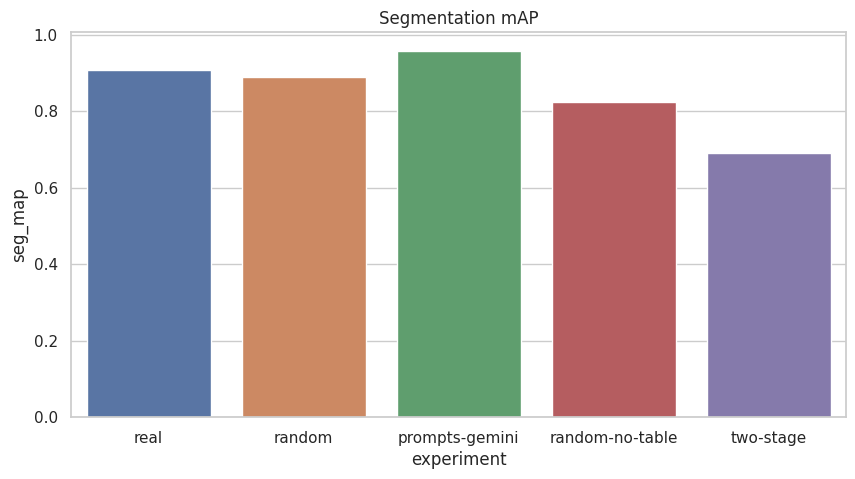

In [129]:
# seg map 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x="experiment", y="seg_map", data=df_two_stage, ax=ax,hue="experiment")
plt.title("Segmentation mAP")

Text(0.5, 1.0, 'Segmentation mAP')

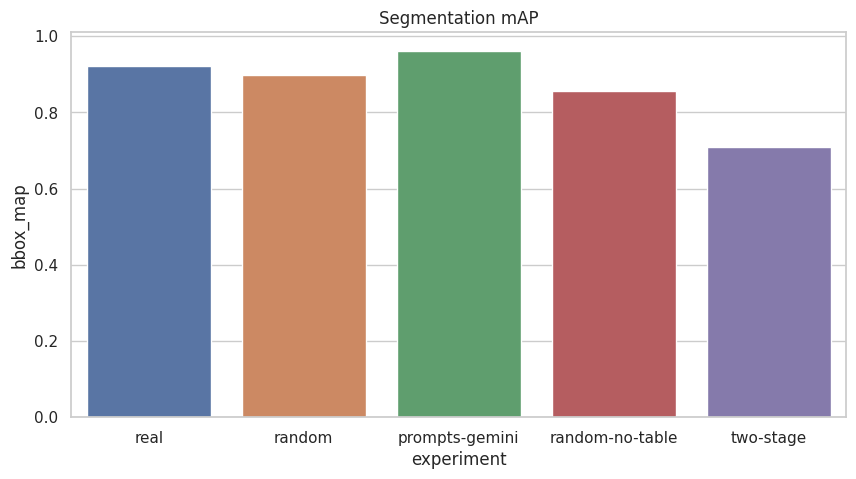

In [130]:
# seg map 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x="experiment", y="bbox_map", data=df_two_stage, ax=ax,hue="experiment")
plt.title("Segmentation mAP")

## CCS experiment


mean_akd_dict

In [131]:
ccs_dict = {key:val for key, val in AKD_dict.items() if "ccs" in key.lower()}
print(AKD_dict)
# split by "CCS_<ccs-value>_<category>_RUN"
# and group into a pandas dataframe
table = {}
for key in ccs_dict.keys():
    table[key] = {"mean_KD": ccs_dict[key]["avg"]}
    try:
        table[key].update({"seg_map": seg_map_dict[key], "bbox_map": bbox_map_dict[key]})
    except KeyError as e :
        print(e)
    table[key].update({"ccs": key.split("_")[1], "category": key.split("_")[2]})

df_ccs = pd.DataFrame.from_dict(table, orient="index")
df_ccs


{'REAL_MUGS_RUN': {'bottom': 14.722730771089212, 'handle': 28.09920924171763, 'top': 22.133659014812096, 'avg': 21.65186634253965}, 'REAL_SHOES_RUN': {'nose': 24.174018120844895, 'heel': 25.597346490601083, 'top': 51.18113931616147, 'avg': 33.65083464253581}, 'REAL_TSHIRTS_RUN': {'shoulder_left': 35.08387092620134, 'neck_left': 21.989902868979524, 'neck_right': 22.3396810167082, 'shoulder_right': 30.857876357088234, 'sleeve_right_top': 27.51857208600504, 'sleeve_right_bottom': 28.06541951849491, 'armpit_right': 23.61256642389417, 'waist_right': 24.715881590891367, 'waist_left': 18.509736158658782, 'armpit_left': 21.258659221419137, 'sleeve_left_bottom': 26.623949782591417, 'sleeve_left_top': 26.501310186662362, 'avg': 25.589785511466204}, 'RANDOM_TEXTURES_MUGS_RUN': {'bottom': 13.066022071743284, 'handle': 21.245964879323953, 'top': 20.733401108671117, 'avg': 18.348462686579452}, 'RANDOM_TEXTURES_SHOES_RUN': {'nose': 9.98470352060375, 'heel': 15.564071772106463, 'top': 14.7318785012362

,mean_KD,ccs,category
CCS_O5_MUGS_RUN,26.509968,O5,MUGS
CCS_O5_SHOES_RUN,43.109458,O5,SHOES
CCS_O5_TSHIRTS_RUN,55.434152,O5,TSHIRTS
CCS_10_MUGS_RUN,20.802401,10,MUGS
CCS_10_SHOES_RUN,18.814360,10,SHOES
CCS_10_TSHIRTS_RUN,26.944954,10,TSHIRTS
CCS_15_MUGS_RUN,17.854912,15,MUGS
CCS_15_SHOES_RUN,19.909872,15,SHOES
CCS_15_TSHIRTS_RUN,45.398178,15,TSHIRTS
CCS_20_MUGS_RUN,21.480141,20,MUGS


([<matplotlib.axis.XTick at 0x7f867a840100>,
 [Text(0, 0, '0.5'),
  Text(1, 0, '1.0'),
  Text(2, 0, '1.5'),
  Text(3, 0, '2.0'),
  Text(4, 0, '2.5')])

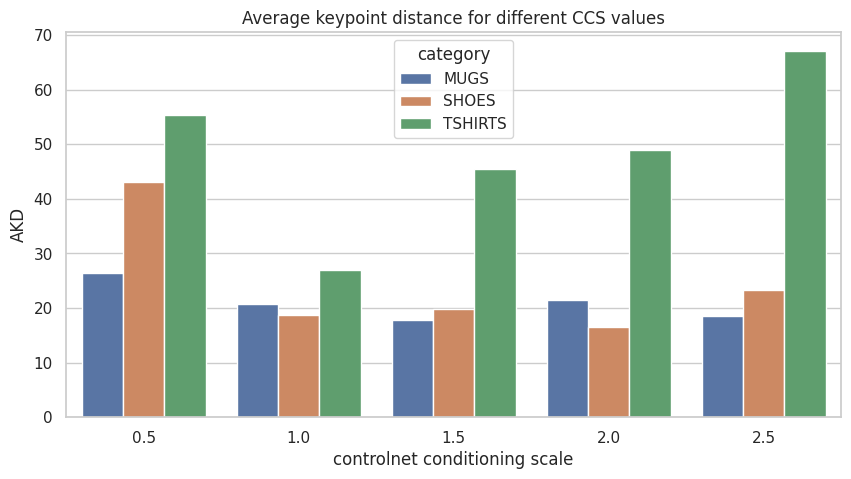

In [132]:
# create barplot of the mean KD for each ccs value 
# don't average over the categories
# but show a multibar plot


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x="ccs", y="mean_KD", data=df_ccs, ax=ax,hue="category")
# sns.lineplot(x="ccs", y="mean_KD", data=df_ccs, ax=ax,hue="category", marker="o")

plt.title("Average keypoint distance for different CCS values")

# x axis label 
plt.xlabel("controlnet conditioning scale")
plt.ylabel("AKD")

# replace x ticks 
plt.xticks([0,1,2,3,4], ["0.5", "1.0", "1.5", "2.0", "2.5"])

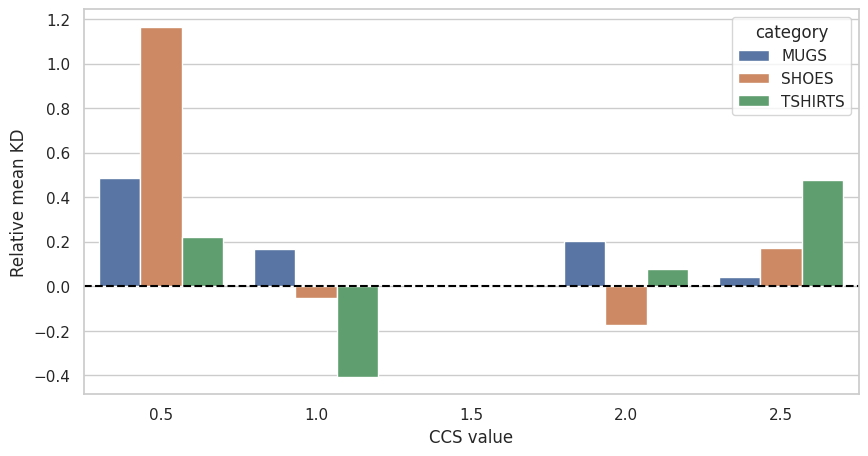

test


In [133]:
# find ccs for each category for ccs_value
category_ccs_dict = {}
for cat in df_ccs["category"].unique():
    ccs = df_ccs[df_ccs["category"] == cat]
    ccs = ccs[ccs["ccs"] == "15"]
    category_ccs_dict[cat] = ccs["mean_KD"].values[0]

df_ccs["relative_mean_KD"] = [(val - category_ccs_dict[cat])/category_ccs_dict[cat] for cat, val in zip(df_ccs["category"], df_ccs["mean_KD"]) ]


# create barplot of the mean KD for each ccs value
# but show the relative difference to the ccs value 1.5
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x="ccs", y="relative_mean_KD", data=df_ccs, ax=ax,hue="category")
# sns.lineplot(x="ccs", y="mean_KD", data=df_ccs, ax=ax,hue="category", marker="o")
# add horizontal line at 0
plt.axhline(0, color="black", linestyle="--")
ax.set_xlabel("CCS value")
plt.xticks([0,1,2,3,4], ["0.5", "1.0", "1.5", "2.0", "2.5"])
ax.set_ylabel("Relative mean KD")
plt.show()
print("test")



/tmp/ipykernel_3774695/2014715752.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(["0.5", "1.0", "1.5", "2.0", "2.5"])
/tmp/ipykernel_3774695/2014715752.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["0.5", "1.0", "1.5", "2.0", "2.5"])
/tmp/ipykernel_3774695/2014715752.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(["0.5", "1.0", "1.5", "2.0", "2.5"])


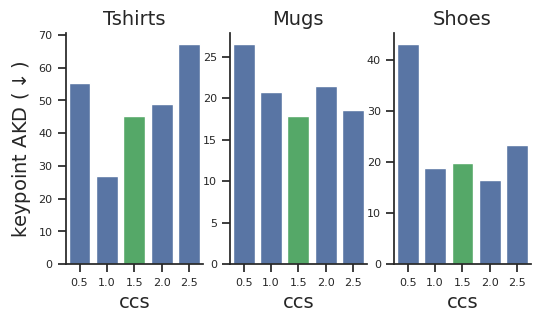

In [171]:
# create 3 spearate plots for each category 


fig, ax = plt.subplots(1,3, figsize=(6,3))
sns.barplot(x="ccs", y="mean_KD", data=df_ccs[df_ccs["category"]=="TSHIRTS"], ax=ax[0])
# mark the best ccs value
ax[0].set_xticklabels(["0.5", "1.0", "1.5", "2.0", "2.5"])
ax[0].set_title("Tshirts")
ax[0].set_ylabel("keypoint AKD ($\\downarrow$)")
ax[0].patches[2].set_facecolor('g')



sns.barplot(x="ccs", y="mean_KD", data=df_ccs[df_ccs["category"] == "MUGS"], ax=ax[1])
ax[1].set_xticklabels(["0.5", "1.0", "1.5", "2.0", "2.5"])
ax[1].set_ylabel("")
ax[1].set_title("Mugs") 
ax[1].patches[2].set_facecolor('g')



sns.barplot(x="ccs", y="mean_KD", data=df_ccs[df_ccs["category"] == "SHOES"], ax=ax[2])
# set title of the subplot
ax[2].set_title("Shoes")
ax[2].set_ylabel("")
ax[2].set_xticklabels(["0.5", "1.0", "1.5", "2.0", "2.5"])
ax[2].patches[2].set_facecolor('g')

# remove boxes
sns.despine()

plt.show()

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig.tight_layout()
fig.savefig("../../visualisations/ccs.png",dpi=300)

/tmp/ipykernel_3774695/3170199379.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(["0.5", "1.0", "1.5", "2.0", "2.5"])
/tmp/ipykernel_3774695/3170199379.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["0.5", "1.0", "1.5", "2.0", "2.5"])


<Axes: xlabel='ccs', ylabel='relative_mean_KD'>

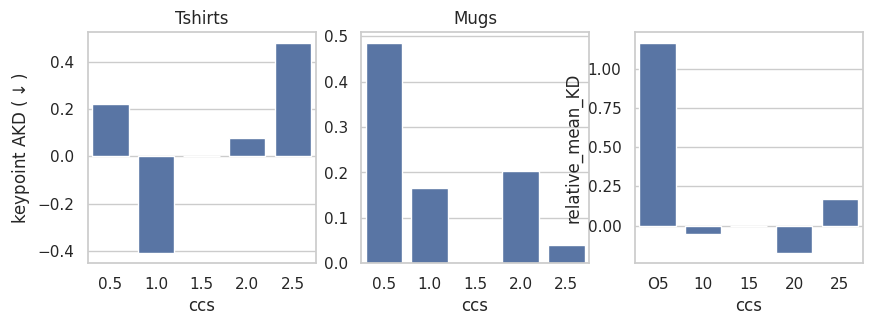

In [135]:
# make this plot again but now with relative values compared to ccs=1.5

# find ccs for each category for ccs_value
category_ccs_dict = {}
for cat in df_ccs["category"].unique():
    ccs = df_ccs[df_ccs["category"] == cat]
    ccs = ccs[ccs["ccs"] == "15"]
    category_ccs_dict[cat] = ccs["mean_KD"].values[0]

df_ccs["relative_mean_KD"] = [(val - category_ccs_dict[cat]) /category_ccs_dict[cat] for cat, val in zip(df_ccs["category"], df_ccs["mean_KD"]) ]

fig, ax = plt.subplots(1,3, figsize=(10,3))
sns.barplot(x="ccs", y="relative_mean_KD", data=df_ccs[df_ccs["category"]=="TSHIRTS"], ax=ax[0])
# mark the best ccs value
ax[0].set_xticklabels(["0.5", "1.0", "1.5", "2.0", "2.5"])

ax[0].set_title("Tshirts")
ax[0].set_ylabel("keypoint AKD ($\\downarrow$)")


sns.barplot(x="ccs", y="relative_mean_KD", data=df_ccs[df_ccs["category"] == "MUGS"], ax=ax[1])
ax[1].set_xticklabels(["0.5", "1.0", "1.5", "2.0", "2.5"])
ax[1].set_ylabel("")
ax[1].set_title("Mugs")


sns.barplot(x="ccs", y="relative_mean_KD", data=df_ccs[df_ccs["category"] == "SHOES"], ax=ax[2])



In [136]:
# plot "inpainting" against "gemini-prompts"

df_control_vs_in = df[df["experiment"].str.contains("img2img") | df["experiment"].str.contains("prompts-gemini") | df["experiment"].str.contains("dual-inpainting") | df["experiment"].str.contains("two-stage")]
df_control_vs_in

# limit df to seg_map and AKD 
df_control_vs_in = df_control_vs_in[["experiment", "seg_map", "AKD", "category"]]
df_control_vs_in

# # create pivot table with category as rows and experiment as columns

pivot = df_control_vs_in.pivot_table(index="experiment", columns="category", values=[ "AKD", "seg_map", ])
pivot = pivot.round(2)

# order "img2img", "prompts-gemini" ,"dual-inpainting", "two-stage"
col_order = ["img2img", "prompts-gemini", "dual-inpainting", "two-stage"]
pivot = pivot.loc[col_order]

pivot

AKD                 seg_map             
category           mug    shoe  tshirt     mug  shoe tshirt
experiment                                                 
img2img          79.08  116.69  200.26    0.04  0.02   0.04
prompts-gemini   17.41   19.58   45.80    0.99  0.95   0.93
dual-inpainting  26.28   48.02   95.22    0.30  0.42   0.43
two-stage        19.77   21.72   49.30    0.75  0.70   0.62

### scale experiments

In [137]:
# filter dataframe for scale experiment
df_scale = df[df["experiment"]=="scale"]
df_scale["size"] = [eval(x.split("_")[-2][:-1])*1000  if "K" in x else eval(x.split("_")[-2]) for x in df_scale["index"]]
df_scale["source"] = [str(x.split("_")[1] )for x in df_scale["index"]]
df_scale["name"] = [df_scale.iloc[i]["category"]+ " - "+  df_scale.iloc[i]["source"].lower()  for i in range(len(df_scale))]
df_scale

# add column that displays the dataset size

/tmp/ipykernel_3774695/3793764570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scale["size"] = [eval(x.split("_")[-2][:-1])*1000  if "K" in x else eval(x.split("_")[-2]) for x in df_scale["index"]]
/tmp/ipykernel_3774695/3793764570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scale["source"] = [str(x.split("_")[1] )for x in df_scale["index"]]
/tmp/ipykernel_3774695/3793764570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,index,meanAP,AKD,median_KD,seg_map,bbox_map,category,experiment,size,source,name
48,SCALE_DIFFUSION_MUGS_1K_RUN,0.417008,18.467871,11.374863,0.987758,0.993643,mug,scale,1000,DIFFUSION,mug - diffusion
49,SCALE_DIFFUSION_SHOES_1K_RUN,0.514104,22.574942,9.886617,0.937507,0.935046,shoe,scale,1000,DIFFUSION,shoe - diffusion
50,SCALE_DIFFUSION_TSHIRTS_1K_RUN,0.493668,56.785014,8.805962,0.845926,0.862644,tshirt,scale,1000,DIFFUSION,tshirt - diffusion
51,SCALE_DIFFUSION_MUGS_2K_RUN,0.415688,24.794009,12.136466,0.975814,0.975597,mug,scale,2000,DIFFUSION,mug - diffusion
52,SCALE_DIFFUSION_SHOES_2K_RUN,0.560567,25.953122,8.795124,0.964442,0.961274,shoe,scale,2000,DIFFUSION,shoe - diffusion
53,SCALE_DIFFUSION_TSHIRTS_2K_RUN,0.520606,47.780647,7.455872,0.895696,0.895219,tshirt,scale,2000,DIFFUSION,tshirt - diffusion
54,SCALE_DIFFUSION_MUGS_5K_RUN,0.492718,15.520960,10.018852,0.992238,0.994002,mug,scale,5000,DIFFUSION,mug - diffusion
55,SCALE_DIFFUSION_SHOES_5K_RUN,0.556752,17.534251,7.883112,0.957623,0.960694,shoe,scale,5000,DIFFUSION,shoe - diffusion
56,SCALE_DIFFUSION_TSHIRTS_5K_RUN,0.546570,47.400622,7.142280,0.865481,0.890512,tshirt,scale,5000,DIFFUSION,tshirt - diffusion
57,SCALE_DIFFUSION_MUGS_10K_RUN,0.534909,15.129895,9.487381,0.990347,0.994033,mug,scale,10000,DIFFUSION,mug - diffusion


Text(0.5, 0, 'dataset size')

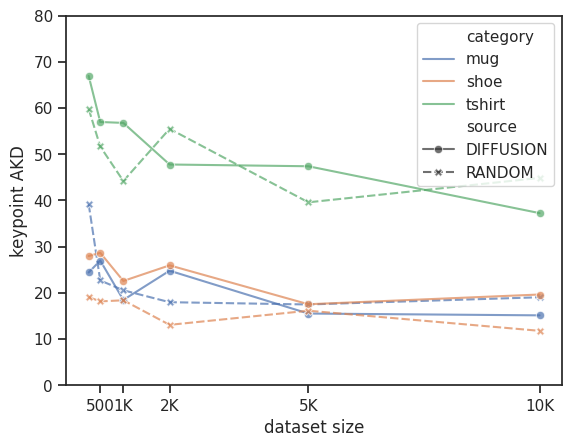

In [138]:
import seaborn as sns
sns.set_style("ticks")

sns.lineplot(data = df_scale, x = "size", y = "AKD",markers=True, hue="category", style="source",alpha=0.7)
plt.xticks([500,1000,2000,5000,10000],["500", "1K", "2K", "5K", "10K"])
plt.ylim((0,80))
plt.ylabel("keypoint AKD")
plt.xlabel("dataset size")
#plt.tick_params(axis='x', direction='in')



Text(0.5, 0, 'dataset size')

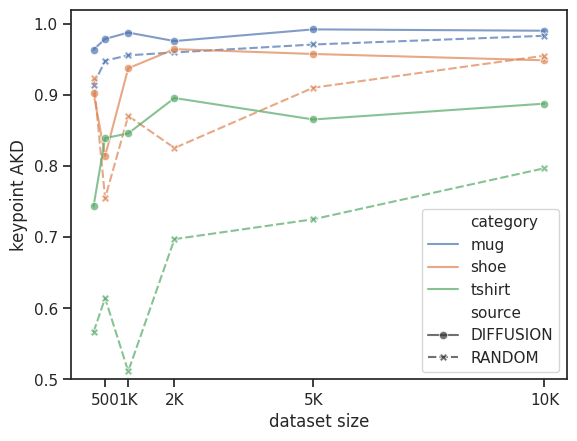

In [139]:
import seaborn as sns
sns.set_style("ticks")

sns.lineplot(data = df_scale, x = "size", y = "seg_map",markers=True, hue="category", style="source",alpha=0.7)
plt.xticks([500,1000,2000,5000,10000],["500", "1K", "2K", "5K", "10K"])
plt.ylim((0.5,1.02))
plt.ylabel("keypoint AKD")
plt.xlabel("dataset size")
#plt.tick_params(axis='x', direction='in')



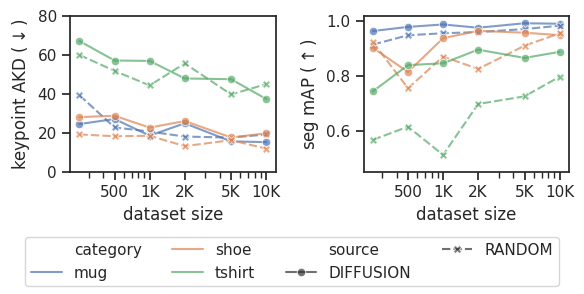

In [140]:
# combine both on a single figure
# two horizontal subplots
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(6,3))
# use log x scale
ax[0].set_xscale("log")
ax[1].set_xscale("log")


sns.lineplot(data = df_scale, x = "size", y = "AKD",markers=True, hue="category", style="source",alpha=0.7, ax=ax[0])
ax[0].get_xaxis().get_major_formatter().labelOnlyBase = False

ax[0].set_xticks([500,1000,2000,5000,10000],["500", "1K", "2K", "5K", "10K"])

sns.lineplot(data = df_scale, x = "size", y = "seg_map",markers=True, hue="category", style="source",alpha=0.7, ax=ax[1])
ax[1].get_xaxis().get_major_formatter().labelOnlyBase = False
plt.xticks([500,1000,2000,5000,10000],["500", "1K", "2K", "5K", "10K"])
ax[0].legend().remove()
ax[0].set_ylim((0,80))
ax[0].set_ylabel("keypoint AKD ($\\downarrow$)")
ax[0].set_xlabel("dataset size")
ax[1].set_ylim((0.45,1.02))
ax[1].legend().remove()
ax[1].set_ylabel("seg mAP ($\\uparrow$)")
ax[1].set_xlabel("dataset size")

# create a legend below the two subplots
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4)
plt.tight_layout()

# make sure the legend does not overlap the x axis labels
plt.subplots_adjust(bottom=0.4)

plt.show()

fig.savefig("../../visualisations/scale.png",dpi=300)